<a href="https://colab.research.google.com/github/wafaa1111/Eng_Diagrams/blob/master/Demo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1- AI Diploma

This notebook, is created by Wafa Alnuaimi. And it will implement NN using the MNIST fashion dataset.


In [5]:
import tensorflow as tf
from tensorflow import keras


```

If the module is not defind then do the follwing :

'''!pip install module_name'''






## Load the dataset

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape


(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

We can create a validation set, which is a good practise to ensure that our model can generalise well across other unseen examples.

In [9]:
x_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 


In [10]:
x_valid.shape

(5000, 28, 28)

In [11]:
X_train.shape

(55000, 28, 28)

The class names in the dataest are defined as follows:

In [12]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
              'Shirt','Sneaker','Bag','Ankle boot']

In [13]:
len(class_names)

10

In [14]:
#check the the class of the first 10 images 
for i in range(15):
    print(f'The class of image {i} is {class_names[y_train[0]]}')

The class of image 0 is Coat
The class of image 1 is Coat
The class of image 2 is Coat
The class of image 3 is Coat
The class of image 4 is Coat
The class of image 5 is Coat
The class of image 6 is Coat
The class of image 7 is Coat
The class of image 8 is Coat
The class of image 9 is Coat
The class of image 10 is Coat
The class of image 11 is Coat
The class of image 12 is Coat
The class of image 13 is Coat
The class of image 14 is Coat


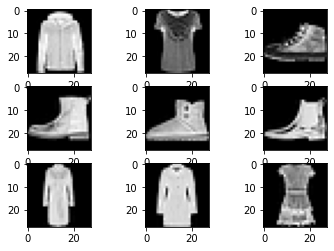

In [15]:
from matplotlib import pyplot
#lets show some of these images 
for i in range(9):

    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [16]:
#pip install matplotlib

## Build Neural Network
New Section
Note how keras makes building the Neural Network model, easy and self-explanatory


In [22]:
# create a neural network model using keras
model = keras.models.Sequential()

# build the first layer, this is the input layer. Note, that flatten converts the 28 by 28 image into 1D array
model.add(keras.layers.Flatten(input_shape=[28,28]))

# add a hidden layer with 300 neurons 
model.add(keras.layers.Dense(300,activation='relu'))

# add another hidden layer with 100 neurons
model.add(keras.layers.Dense(100,activation='relu'))

# add output layer (note we have 10 outputs representing 10 classes)
model.add(keras.layers.Dense(10,activation='softmax'))

OK, lets check how our model looks like, you can simply using the following function: 


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Recall, we said that the weights are ranomly initialised, you can check the weights using the following function: 
    

In [24]:
weights, biases = model.layers[1].get_weights()

In [25]:
weights

array([[ 0.01830942, -0.03075471,  0.03787655, ..., -0.02245375,
         0.05852798, -0.05878463],
       [-0.02297261, -0.02874072, -0.00715622, ..., -0.07093877,
        -0.06978346,  0.03324416],
       [ 0.07298565, -0.06475968,  0.03547186, ..., -0.05129849,
         0.03150219,  0.01849232],
       ...,
       [ 0.05950014, -0.04745896, -0.04971039, ...,  0.01146128,
        -0.00673547, -0.0099716 ],
       [-0.06664661,  0.03201443, -0.04043443, ...,  0.04728146,
         0.03603323,  0.06384134],
       [-0.04904689,  0.03524061,  0.0173841 , ..., -0.02421139,
         0.0335528 ,  0.06970035]], dtype=float32)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Compiling the Model

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics='accuracy')

Notice that to start the training (fitting the model), we pass the X_train, and the class labels (y_train), as well as the number of epochs (discussed in the class), and here we use the optimizer 'sgd', which is the Stochastic Gradient Descent, and finally, we set the evaluation metric to be the accuracy (number of correctly classified examples)

In [28]:
#training
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7146 - accuracy: 0.7653 - val_loss: 0.5133 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4845 - accuracy: 0.8297 - val_loss: 0.4412 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4400 - accuracy: 0.8462 - val_loss: 0.4288 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4139 - accuracy: 0.8539 - val_loss: 0.4016 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3929 - accuracy: 0.8621 - val_loss: 0.3876 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3777 - accuracy: 0.8670 - val_loss: 0.3836 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8707 - val_loss: 0.3775 - val_accura

Another thing to note is that we pass the validation set. You will notice that keras at each epoch during the training process display the number of instances processed, the mean training time per instance, and the loss and accuracy. A good model should show a decreasing loss value over time as well as increase in accuracy.

The fit() function returns a History object that contains the training parameters (history.params), the list of epochs it went through (history.epoch), and a history dictionary (history.history) containing the loss and extra metrics. This is particularly useful to display the loss plots, and assess if the model is overfitting or not as can be seen below:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

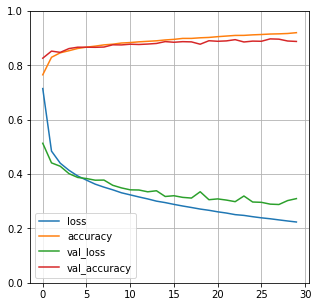

In [30]:
pd.DataFrame(history.history).plot(figsize=(5,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the range between 0 to 1
plt.show()

Have a closer look at the training and validation accuracy as well as training and validation losses. These values over the various epochs tell you how stable your model is

# Testing your Model

Although the model seems to be stable and the results are relatively good, there are different ways to improve these results:


*   Do some hyperparamter tunning (e.g. check the learning rate)

*   You may change the number of layers

*   Change the number of neurons in each layer

*   Change the batch size, this can be set in the fit() method using the parameter batch_size argument (notice that the default value is 32

*   You can also try different optimisers other than sgd, one very popular optimiser is the adam optimiser
*   Collect more data,
And other methods


You may try to apply some changes and re-fit your model. However, for now, we will assume that we are happy with this training results. The following step in building your first neural network, is to test the model using the testing set. This is very important step, and shows how can your model generalise across other unseen examples (images in this case). This step can be easily done using keras as follows:



In [31]:
# the function below returns accuracy and loss values of the model
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 75.0885 - accuracy: 0.8369


In [32]:
print(f'Accuracy of the Neural Network is {round(results[1],2)*100}%')

Accuracy of the Neural Network is 84.0%


Now, you can also make predictions using the resulting model as follows: 

In [33]:
# consider the first three imgaes in the testing set
testing_images = X_test[:3]

# use predict to classify the images above
y_prob = model.predict(testing_images)
y_prob.round(2)

1/1 [==============================] - 0s 129ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you look at the array above, you will notice that for each image the model estimates the probability per class, from class 0 to 9 (recall, we have 10 different classes in our dataset):

*   The model estimates that the first image in the testing_images is of class 9

*   Similarly, the second image is of class 2 and so on


Instead, and if you only want the class with the highest estimated probability, then you can use the predict_classes() method as follows:

In [34]:
import numpy as np
y_pred = np.argmax(model.predict(testing_images), axis=-1)
y_pred

1/1 [==============================] - 0s 54ms/step


array([9, 2, 1])

In [35]:
# Check the actual class names of the predicted test imgaes 
for i in range (len(testing_images)):
    print (f'The class name of {y_pred[i]} is {class_names[y_pred[i]]}')

The class name of 9 is Ankle boot
The class name of 2 is Pullover
The class name of 1 is Trouser


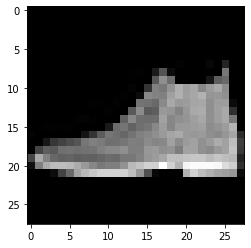

In [36]:
# You can further verify this by visualising these testing images 
pyplot.imshow(testing_images[0], cmap=pyplot.get_cmap('gray'))

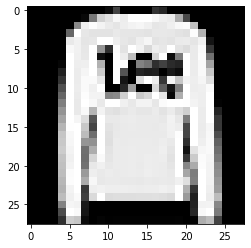

In [38]:
pyplot.imshow(testing_images[1], cmap=pyplot.get_cmap('gray'))

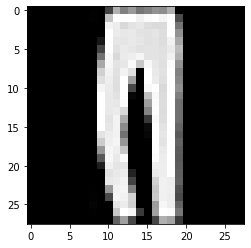

In [39]:
pyplot.imshow(testing_images[2], cmap=pyplot.get_cmap('gray'))

THANK YOU ...